In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
print("Libraries are ready!")

Matplotlib is building the font cache; this may take a moment.


Libraries are ready!


In [5]:
import pandas as pd

# Load CSV file
attached_df = pd.read_csv("The Attached Dataset 2.csv")  # exact filename with .csv

# Quick peek
print(attached_df.head())

   id  age  gender  education marital_status      workclass      occupation  \
0   1   63  Female    Masters        Married     Unemployed   Other-service   
1   2   20  Female        PhD        Married     Government             NaN   
2   3   46  Female  Bachelors       Divorced     Unemployed    Tech-support   
3   4   52   Other    Masters         Single     Government   Other-service   
4   5   56  Female    Masters         Single  Self-Employed  Prof-specialty   

   hours_per_week  capital_gain  capital_loss native_country annual_income  \
0              57         28219          7604             us       80471.0   
1              98         26959          8738            NaN       83789.0   
2               8         15621          7180          India       93380.0   
3               9         26022          8588             us       41035.0   
4              49          3075          2399             UK       69893.0   

  loan_status  experience_years  job_satisfaction   bmi 

In [6]:
# Missing values per column
print("Missing values:\n", attached_df.isnull().sum())

# Duplicate rows
print("Duplicate rows:", attached_df.duplicated().sum())

Missing values:
 id                     0
age                    0
gender                 0
education              0
marital_status         0
workclass            252
occupation           252
hours_per_week         0
capital_gain           0
capital_loss           0
native_country       254
annual_income        251
loan_status            0
experience_years       0
job_satisfaction       0
bmi                  250
smoking_status         0
physical_activity      0
credit_score         250
disease_risk           0
dtype: int64
Duplicate rows: 49


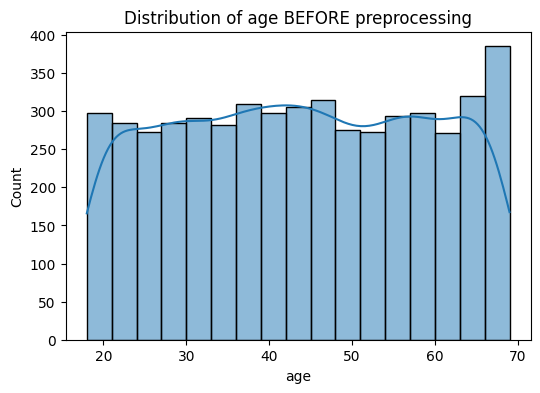

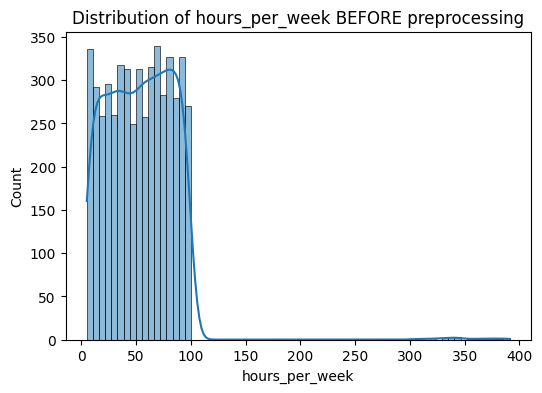

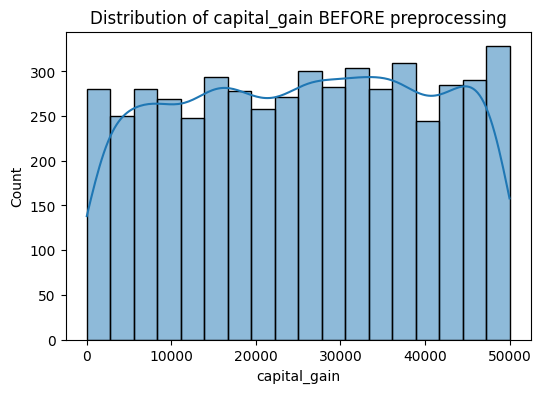

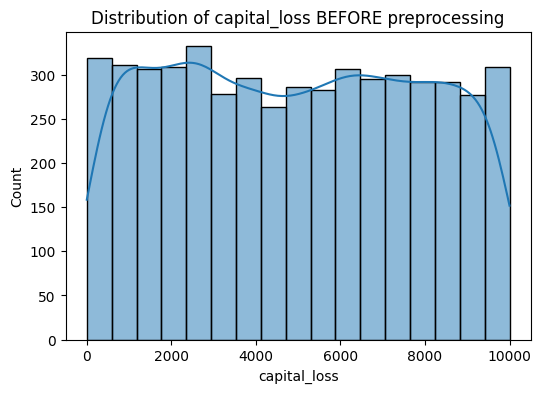

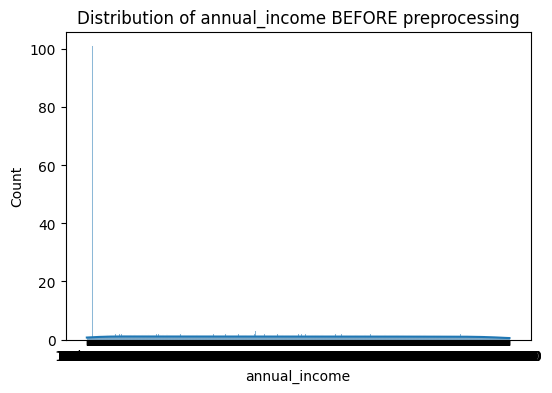

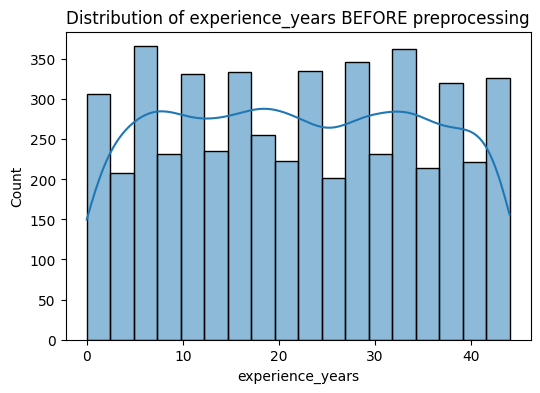

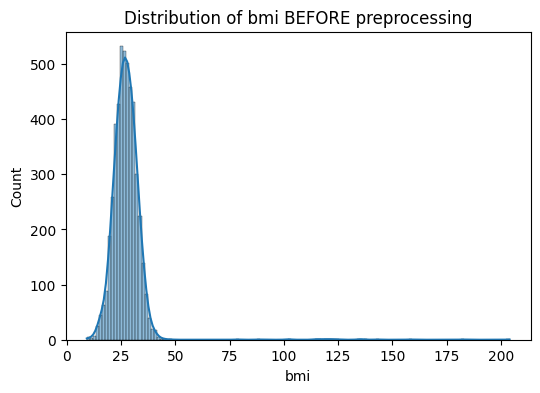

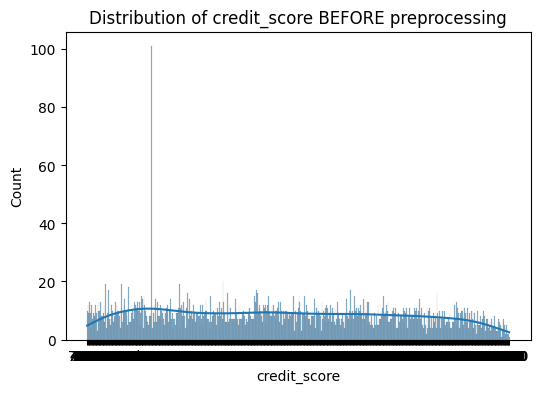

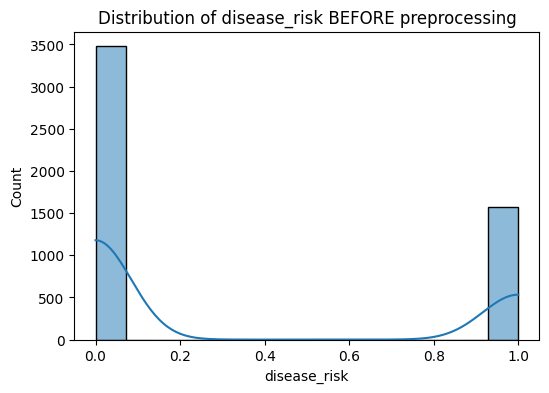

In [7]:
# Numeric columns
num_cols = ['age','hours_per_week','capital_gain','capital_loss','annual_income','experience_years','bmi','credit_score','disease_risk']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(attached_df[col], kde=True)
    plt.title(f'Distribution of {col} BEFORE preprocessing')
    plt.show()

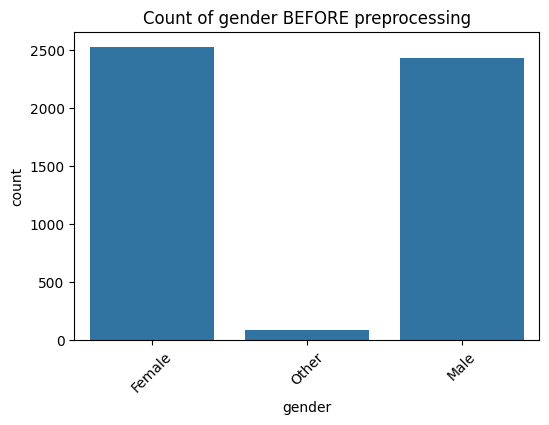

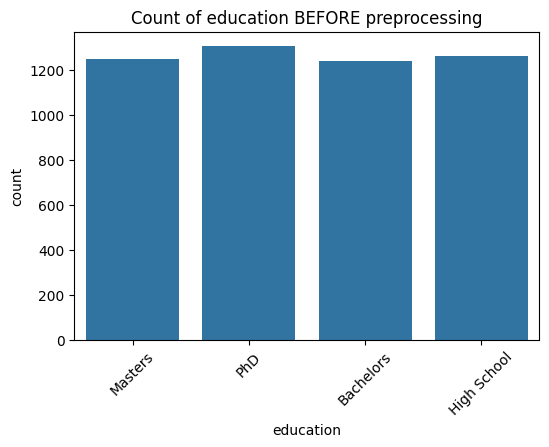

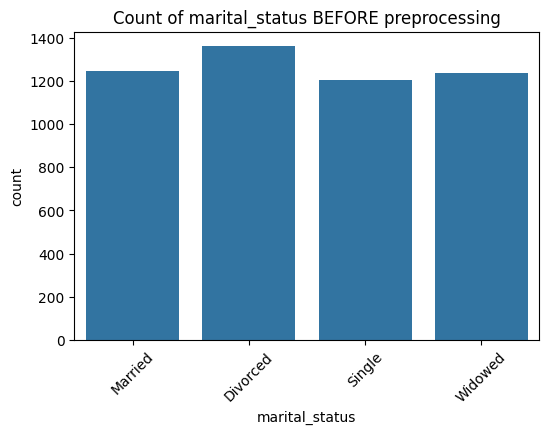

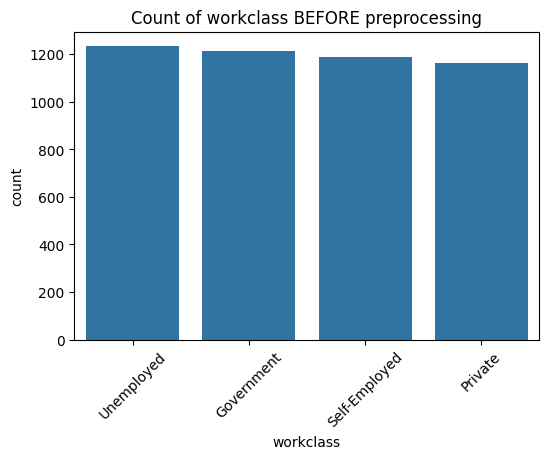

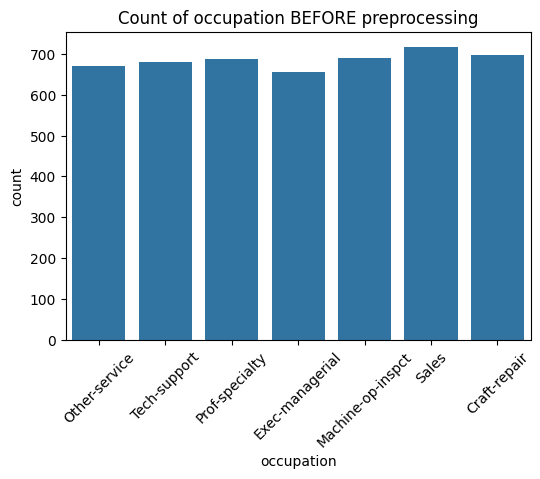

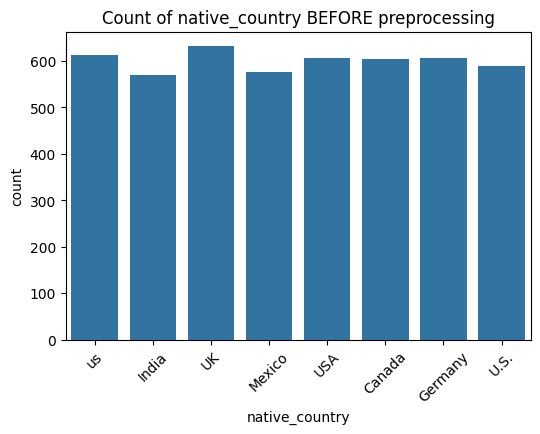

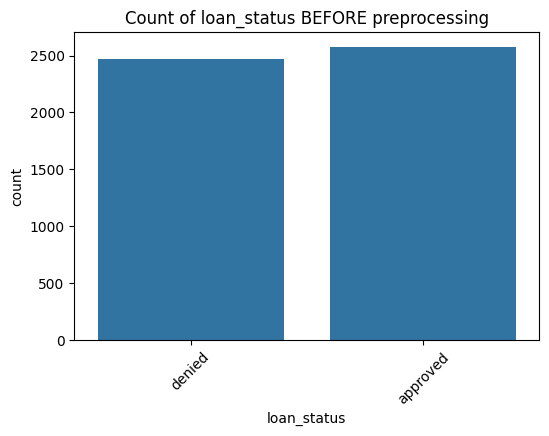

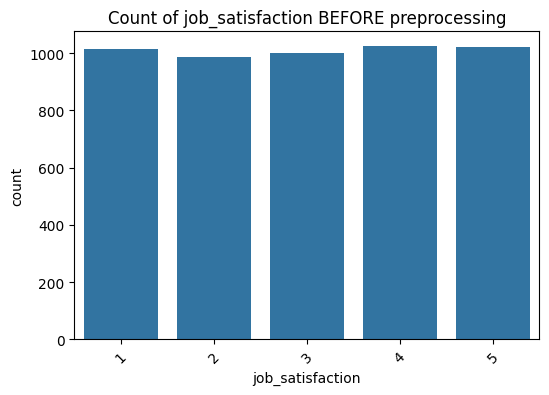

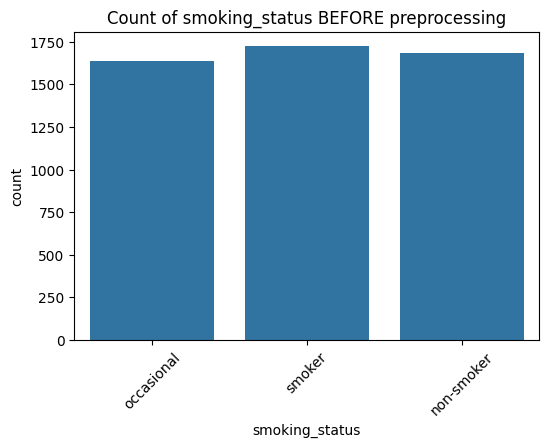

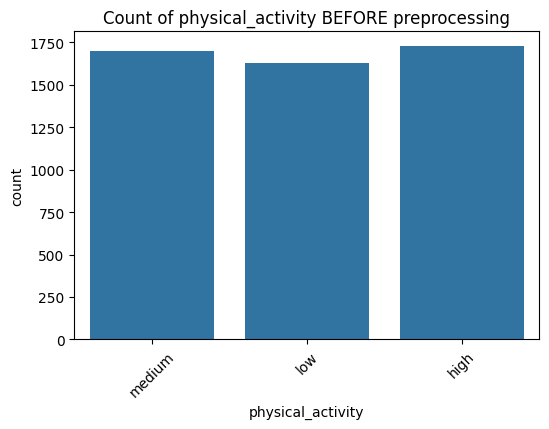

In [8]:
cat_cols = ['gender','education','marital_status','workclass','occupation','native_country','loan_status','job_satisfaction','smoking_status','physical_activity']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=attached_df[col])
    plt.title(f'Count of {col} BEFORE preprocessing')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# Step 4a: Handle Missing Values

# Numeric columns → fill with median
for col in attached_df.select_dtypes(include=['int64','float64']).columns:
    attached_df[col] = attached_df[col].fillna(attached_df[col].median())

# Categorical columns → fill with mode
for col in attached_df.select_dtypes(include=['object']).columns:
    attached_df[col] = attached_df[col].fillna(attached_df[col].mode()[0])

# Step 4b: Remove Duplicates
attached_df = attached_df.drop_duplicates()

# Step 4c: Check again
print("Missing values after preprocessing:\n", attached_df.isnull().sum())
print("Duplicate rows after preprocessing:", attached_df.duplicated().sum())

Missing values after preprocessing:
 id                   0
age                  0
gender               0
education            0
marital_status       0
workclass            0
occupation           0
hours_per_week       0
capital_gain         0
capital_loss         0
native_country       0
annual_income        0
loan_status          0
experience_years     0
job_satisfaction     0
bmi                  0
smoking_status       0
physical_activity    0
credit_score         0
disease_risk         0
dtype: int64
Duplicate rows after preprocessing: 0


In [12]:
from sklearn.preprocessing import LabelEncoder

# Step 5a: Label Encoding (ordinal / target-like)
le = LabelEncoder()

# Example: job_satisfaction (1-5 scale) → numeric values
attached_df['job_satisfaction'] = le.fit_transform(attached_df['job_satisfaction'])

# Step 5b: One-Hot Encoding (nominal columns)
nominal_cols = ['gender','marital_status','workclass','occupation','native_country',
                'loan_status','smoking_status','physical_activity']

attached_df = pd.get_dummies(attached_df, columns=nominal_cols, drop_first=True)

# Step 5c: Verify encoding
print(attached_df.head())
print("\nColumns after encoding:", attached_df.columns)


   id  age  education  hours_per_week  capital_gain  capital_loss  \
0   1   63    Masters              57         28219          7604   
1   2   20        PhD              98         26959          8738   
2   3   46  Bachelors               8         15621          7180   
3   4   52    Masters               9         26022          8588   
4   5   56    Masters              49          3075          2399   

  annual_income  experience_years  job_satisfaction   bmi  ...  \
0       80471.0                26                 0  21.1  ...   
1       83789.0                34                 2  23.9  ...   
2       93380.0                 5                 3  28.4  ...   
3       41035.0                19                 4  26.6  ...   
4       69893.0                19                 0  24.5  ...   

  native_country_Mexico  native_country_U.S.  native_country_UK  \
0                 False                False              False   
1                 False                False          

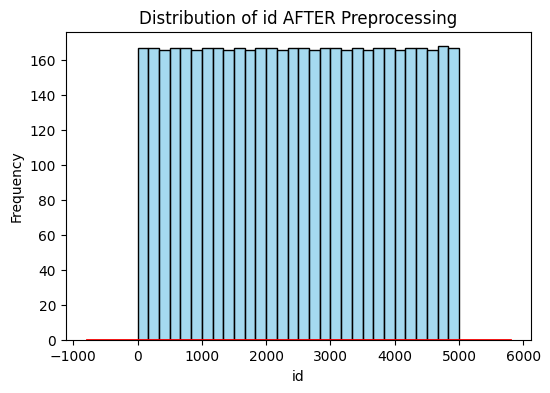

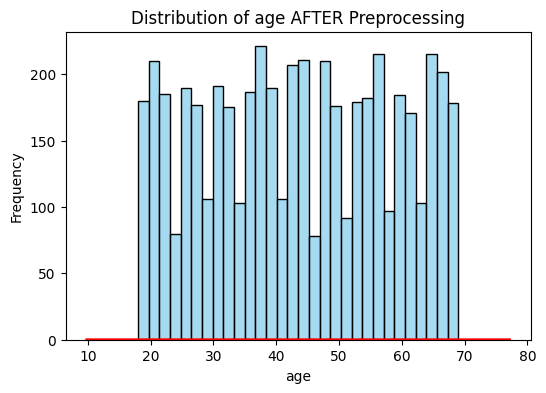

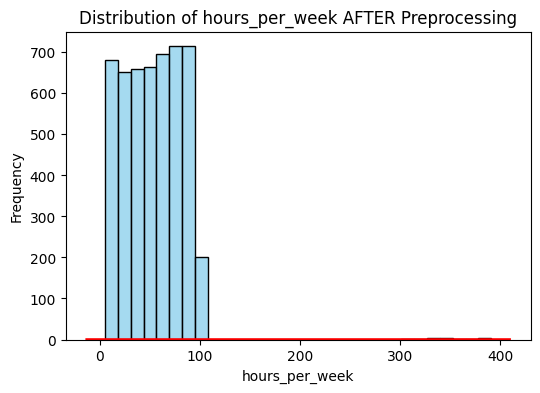

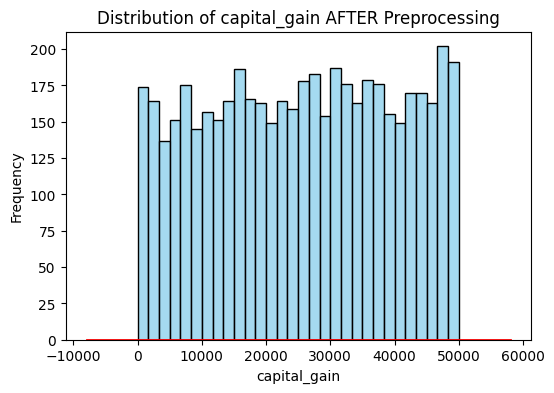

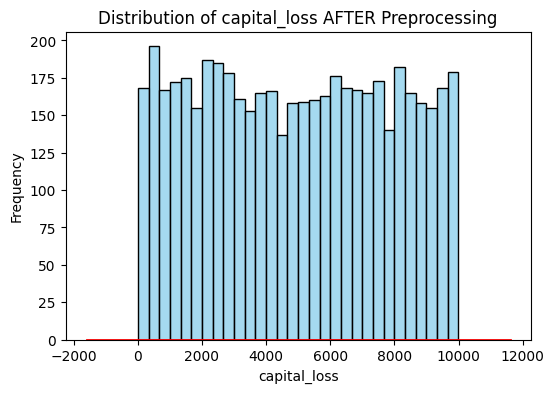

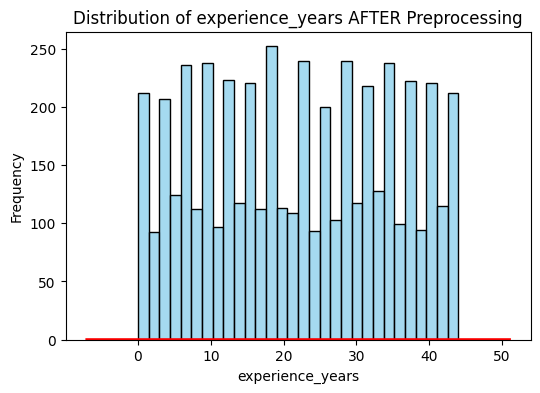

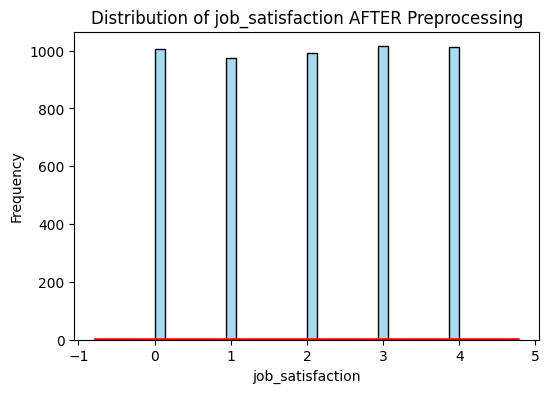

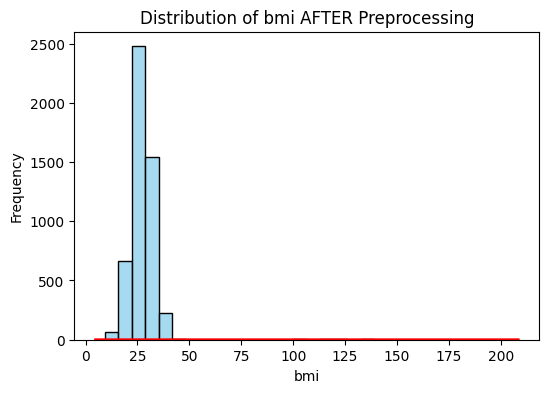

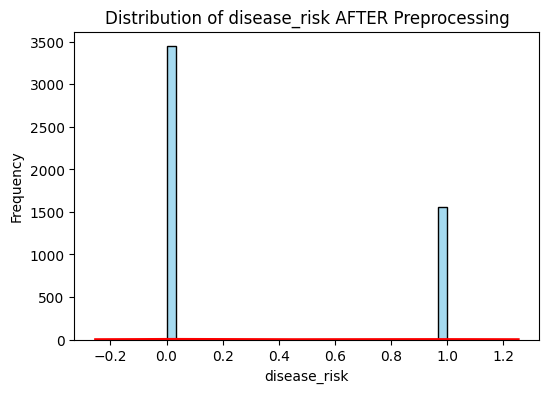

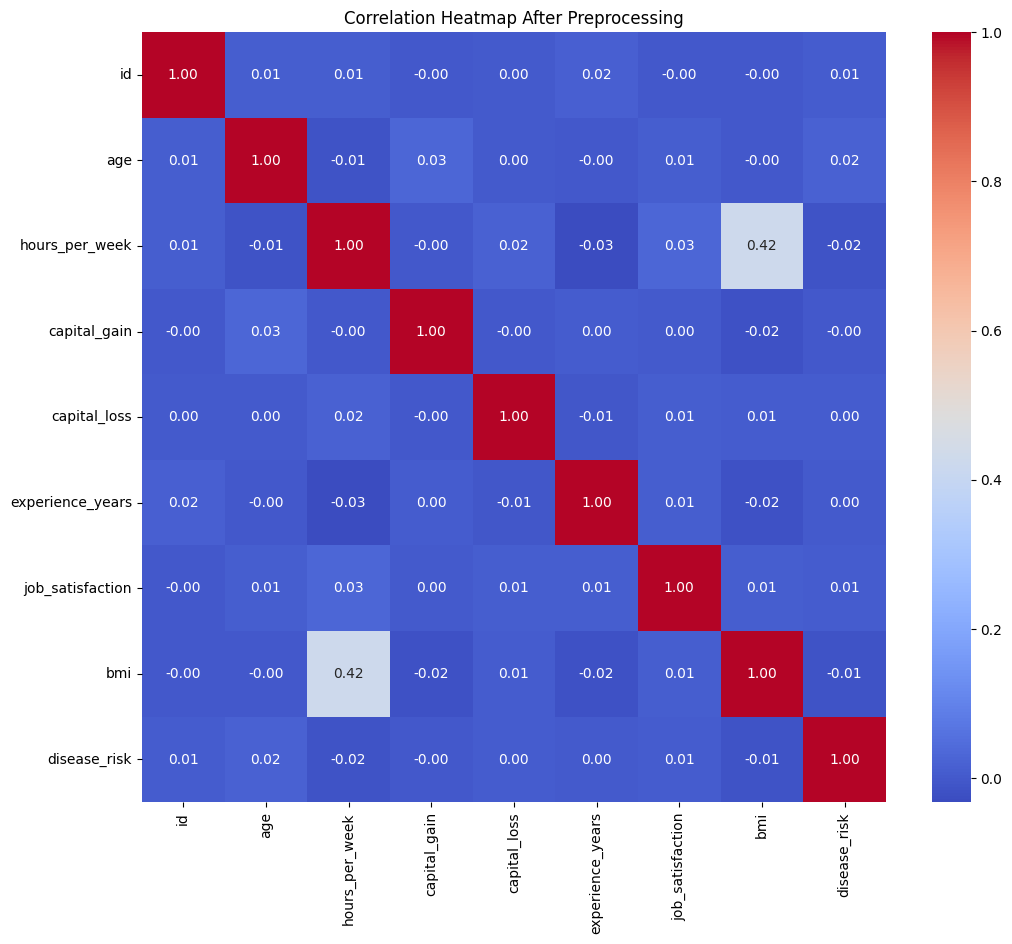

Sample of One-Hot encoded categorical columns:
    gender_Male  gender_Other  marital_status_Married  marital_status_Single  \
0        False         False                    True                  False   
1        False         False                    True                  False   
2        False         False                   False                  False   
3        False          True                   False                   True   
4        False         False                   False                   True   

   marital_status_Widowed  workclass_Private  workclass_Self-Employed  \
0                   False              False                    False   
1                   False              False                    False   
2                   False              False                    False   
3                   False              False                    False   
4                   False              False                     True   

   workclass_Unemployed  occupation_Ex

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Step 6a: Numeric Columns Histograms with clear colors
# -----------------------------
numeric_cols = attached_df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    # Histogram in light blue
    sns.histplot(attached_df[col], bins=30, color='skyblue', kde=False)
    # KDE line in red for clear distinction
    sns.kdeplot(attached_df[col], color='red', linewidth=2)
    
    plt.title(f'Distribution of {col} AFTER Preprocessing')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# -----------------------------
# Step 6b: Correlation Heatmap (Numeric only)
# -----------------------------
plt.figure(figsize=(12,10))
sns.heatmap(attached_df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap After Preprocessing')
plt.show()

# -----------------------------
# Step 6c: Optional – Sample check of One-Hot encoded categorical columns
# -----------------------------
cat_sample = attached_df.filter(regex='gender_|marital_status_|workclass_|occupation_|native_country_')
print("Sample of One-Hot encoded categorical columns:\n", cat_sample.head())
